In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# 일차함수 모델 함수 정의
def model(x, w, b):
    y = w * x + b
    return y

# RMSE값을 구하는 함수
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

# 손실함수
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

# 기울기 계산 함수
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [4]:
'''
데이터 확인하기
pandas - csv to DataFrame
DataFrame shape
DataFrame head()
'''
macbook = pd.read_csv('./data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


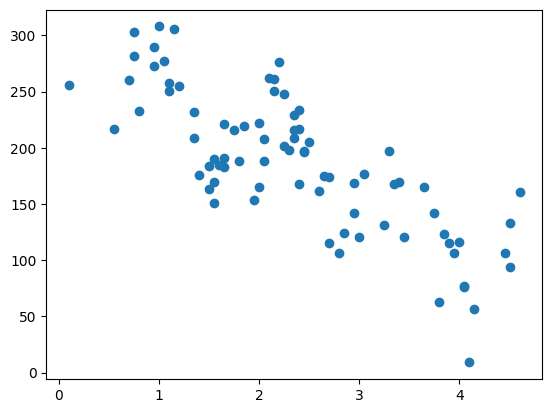

In [10]:
'''
데이터 시각화
matplotlib.pyplot - scatter
'''
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [13]:
'''
상관계수
numpy - corrcoef(x, y)
>> 2x2 행렬 반환
(0,0) 과 (1,1) 위치는 항상 1 : 자기 자신과 비교한 상관계수
'''
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

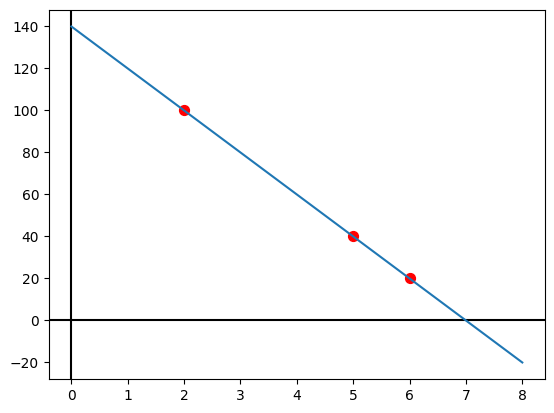

In [8]:
'''
모델
- x : 사용 연수를 입력받아
- y : 중고가 예측
'''
x = macbook["used_years"].values
y = macbook["price"].values

# 일차함수 모델 함수 정의
def model(x, w, b):
    y = w * x + b
    return y

# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

In [30]:
'''
데이터 전처리
prediction 컬럼추가 : 모든 사용연수에 대한 중고가 예측값
error 컬럼추가 : 정답과 예측값 간 차이
'''
x = macbook["used_years"].values
macbook['prediction'] = model(x, w = 3.1, b = 2.3)
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [31]:
'''모델이 얼마나 틀렸는지를 평가하는 지표
MAE : Mean Absolute Error, 오차의 절댓값의 평균
MSE : Mean Squared Error, 오차의 제곱의 평균
RMSE : Root Mean Squared Error, MSE의 제곱근
R-squared : Coefficient of Determination, 결정 계수
'''
# RMSE값을 구하는 함수
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

rmse = RMSE(macbook['prediction'], macbook['price'])
rmse

188.81322969819274

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038
w: -44.92756090768412, b:293.0815786721102


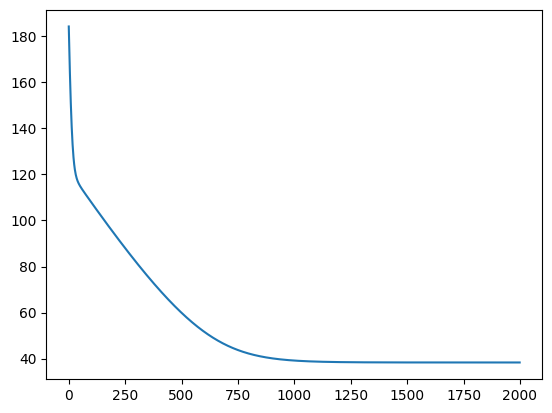

In [34]:
'''
손실함수(loss function), 또는 비용함수(cost function)
모델의 예측값과 정답값에 대한 차이를 계산하는 함수
'''
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
'''
loss(x, w, b, y)
x, y : 주어진 데이터 >> 수정 할 수 없다.
w, b : 파라미터, 가중치 >> loss를 줄이기 위해 수정 가능한 변수

Gradient Descent Method, 즉 경사하강법 
기울기를 활용해서 다음과 같은 규칙으로 w를 업데이트
1. 현재 w에서의 기울기를 구한다.
2. 기울기가 음수라면, 현재 w를 키운다.
3. 기울기가 양수라면, 현재 w를 줄인다.   
'''
# 기울기 계산 함수
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
'''
하이퍼 파라미터
모델이 스스로 학습해나가는 파라미터 가 아니라, 사람이 직접 사전에 정하고 시작해야 하는 파라미터
실제 모델의 성능을 끌어올리기 위해서는 최적의 하이퍼 파라미터를 찾는 것 또한 매우 중요
'''
# 학습률
LEARNING_RATE = 1

# 입력데이터 x, 정답 데이터 y
x = macbook["used_years"].values
y = macbook["price"].values

# 초기 가중치
w = 3.1
b = 2.3

# 단계별 손실함수값
losses = []

for i in range(1, 2001):
    # 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    dw, db = gradient(x, w, b, y)   
    # w = w - η * dw 로 업데이트
    w -= LEARNING_RATE * dw
    # b = b - η * db 로 업데이트          
    b -= LEARNING_RATE * db
    # 현재의 loss 값 계산
    L = loss(x, w, b, y)
    # loss 값 기록
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

w: -44.92756090768412, b:293.0815786721102


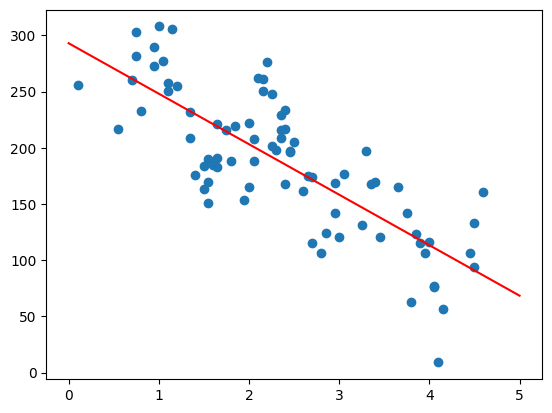

In [35]:
# 학습이 완료된 모델, 일차함수
print('w: {}, b:{}'.format(w, b))

# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

(20, 2)


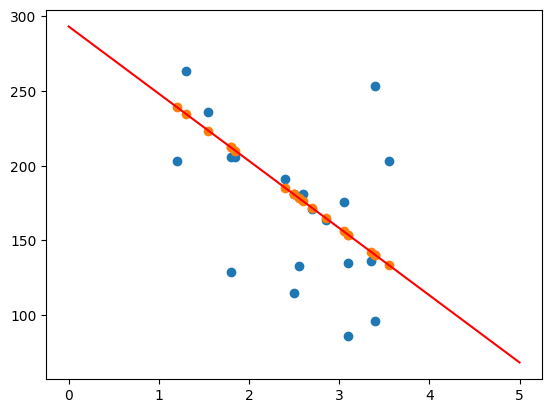

In [14]:
# 테스트 데이터
test = pd.read_csv("./data/macbook_test.csv")
print(test.shape)
test.head()

test_x = test['used_years'].values
test_y = test['price'].values

# 초기 가중치 -44.92756090768412, b:293.0815786721102
w = -44.92756090768412
b = 293.0815786721102
test['prediction'] = model(test_x, w, b)
test['error'] = test['price'] - test['prediction'] # error 직접 계산
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5

# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()